# Programming Exercises Question 2 - The Titanic Disaster

In [ ]:
## Importing all the required libraries

In [128]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn import metrics

In [ ]:
## Loading train data and performing exploratory data analysis on it

In [93]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [94]:
train_df.shape

(891, 12)

In [95]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Droppping the columns from the training dataset that are not relevant

In [96]:
train_df = train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
train_df.shape

(891, 8)

In [97]:
train_df.groupby(['Embarked']).count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,168,168,168,130,168,168,168
Q,77,77,77,28,77,77,77
S,644,644,644,554,644,644,644


In [ ]:
## Filling the empty values in the Embarked column of the dataset with the values that occur most frequently in the data 

In [98]:
train_df['Embarked'].fillna('S', inplace = True)
train_df.groupby(['Embarked']).count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,168,168,168,130,168,168,168
Q,77,77,77,28,77,77,77
S,646,646,646,556,646,646,646


In [ ]:
## Checking Age distribution and filling empty values in the Age column by interpolating the data in the column

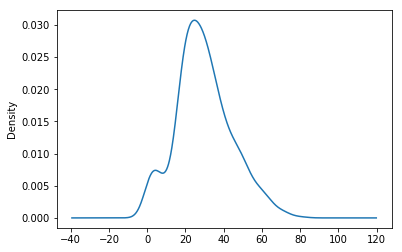

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [99]:
train_df['Age'].plot(kind = 'Density')
plt.show()
print(train_df['Age'].describe())

In [100]:
#train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
#train_df['Age'].plot(kind = 'Density')
#print(train_df['Age'].describe())
#plt.show()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


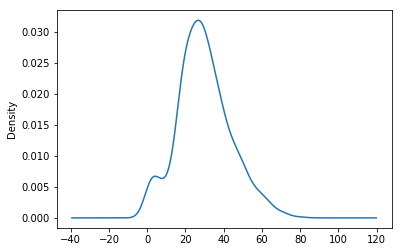

In [101]:
train_df['Age'].interpolate(method = 'linear', inplace = True)
train_df['Age'].plot(kind = 'Density')
print(train_df['Age'].describe())
plt.show()

In [102]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [103]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,44.5,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [104]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
## Forming a new 'Clubbed' column by merging the siblings and parents columns in the dataset and dropping the latter columns 

In [105]:
train_df['Clubbed'] = np.where((train_df['SibSp'] + train_df['Parch'])>0, 1, 0)
train_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Clubbed
886,0,2,male,27.0,13.00,S,0
887,1,1,female,19.0,30.00,S,0
888,0,3,female,22.5,23.45,S,1
889,1,1,male,26.0,30.00,C,0
890,0,3,male,32.0,7.75,Q,0


In [125]:
train_df.corr()

,Survived,Pclass,Age,Fare,Clubbed
Survived,1.000000,-0.338481,-0.062164,0.257307,0.203367
Pclass,-0.338481,1.000000,-0.304934,-0.549500,-0.135207
Age,-0.062164,-0.304934,1.000000,0.087119,-0.169425
Fare,0.257307,-0.549500,0.087119,1.000000,0.271832
Clubbed,0.203367,-0.135207,-0.169425,0.271832,1.000000


In [ ]:
## Performing one-hot encoding on the data to remove biases and dropping the initial columns and retaining the new binary columns 

In [106]:
train_oh = pd.get_dummies(train_df, columns = ['Pclass', 'Sex', 'Embarked'])
train_oh.head()

,Survived,Age,Fare,Clubbed,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,0,0,0,1,0,1,0,0,1


In [107]:
train_oh.drop(['Sex_female'], axis = 1, inplace = True)
train_oh.head()

,Survived,Age,Fare,Clubbed,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,1,1,0,0,1
1,1,38.0,71.2833,1,1,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,0,1,1,0,0,1


In [ ]:
## Exploring other attributes in the data and their flow with the Survived column to observe and fix modes

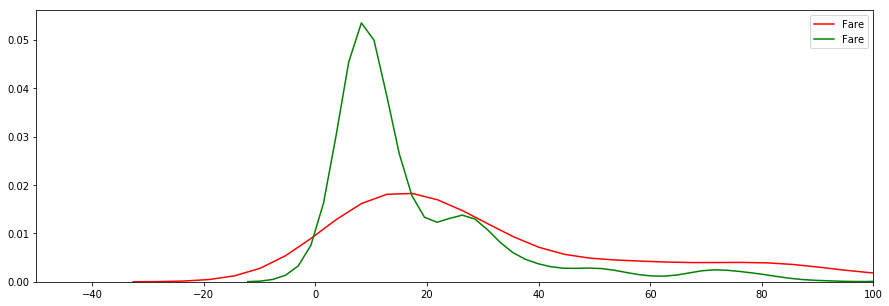

In [119]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(train_oh["Fare"][train_oh['Survived'] == 1], color="r")
sns.kdeplot(train_oh["Fare"][train_oh['Survived'] == 0], color="g")
plt.xlim(-50,100)
plt.show()

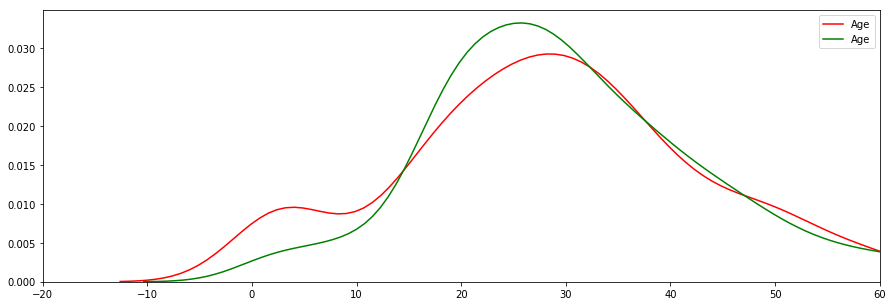

In [121]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(train_oh["Age"][train_oh['Survived'] == 1], color="r")
sns.kdeplot(train_oh["Age"][train_oh['Survived'] == 0], color="g")
plt.xlim(-20, 60)
plt.show()

In [126]:
train_oh.corr()

,Survived,Age,Fare,Clubbed,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.062164,0.257307,0.203367,0.285904,0.093349,-0.322308,-0.543351,0.168240,0.003650,-0.149683
Age,-0.062164,1.000000,0.087119,-0.169425,0.297502,-0.000457,-0.255957,0.061332,0.015818,0.019004,-0.025817
Fare,0.257307,0.087119,1.000000,0.271832,0.591711,-0.118557,-0.413333,-0.182333,0.269335,-0.117216,-0.162184
Clubbed,0.203367,-0.169425,0.271832,1.000000,0.113364,0.039070,-0.129472,-0.303646,0.095298,-0.086464,-0.029074
Pclass_1,0.285904,0.297502,0.591711,0.113364,1.000000,-0.288585,-0.626738,-0.098013,0.296423,-0.155342,-0.161921
Pclass_2,0.093349,-0.000457,-0.118557,0.039070,-0.288585,1.000000,-0.565210,-0.064746,-0.125416,-0.127301,0.189980
Pclass_3,-0.322308,-0.255957,-0.413333,-0.129472,-0.626738,-0.565210,1.000000,0.137143,-0.153329,0.237449,-0.015104
Sex_male,-0.543351,0.061332,-0.182333,-0.303646,-0.098013,-0.064746,0.137143,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,0.015818,0.269335,0.095298,0.296423,-0.125416,-0.153329,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.019004,-0.117216,-0.086464,-0.155342,-0.127301,0.237449,-0.074115,-0.148258,1.000000,-0.499421


In [ ]:
## Forming xtrain and ytrain data to apply logistic regression model along with cross validation

In [129]:
x = train_oh.drop(['Survived'], axis = 1)
y = train_oh['Survived']

In [130]:
model = LogisticRegression()
train_rfecv = RFECV(estimator = model, step = 1, cv = 10, scoring ='accuracy')
train_rfecv.fit(x, y)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [ ]:
## Checking model's feature ranking to keep relevant features and drop irrelevnt features

In [131]:
print(train_rfecv.n_features_)
print(train_rfecv.support_)
print(train_rfecv.ranking_)

9
[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]


In [133]:
train_final = train_oh.drop(['Fare'], axis = 1)
train_final.head()

,Survived,Age,Clubbed,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,1,0,0,1
1,1,38.0,1,1,0,0,0,1,0,0
2,1,26.0,0,0,0,1,0,0,0,1
3,1,35.0,1,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,0,1


## Downloading and implementing changes on Test Data

In [ ]:
## Performing the same changes on test data set as were performed on train dataset

In [135]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
test_df.shape

(418, 11)

In [139]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [140]:
test_df = test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
test_df.shape

(418, 7)

In [141]:
test_df.groupby(['Embarked']).count()

,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,102,102,82,102,102,102
Q,46,46,22,46,46,46
S,270,270,228,270,270,269


count    418.000000
mean      30.045251
std       13.502708
min        0.170000
25%       21.500000
50%       27.700000
75%       38.875000
max       76.000000
Name: Age, dtype: float64


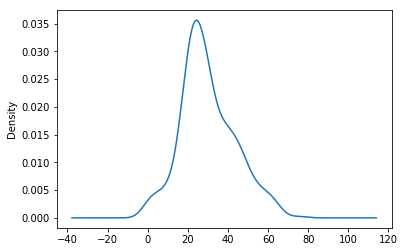

In [142]:
test_df['Age'].interpolate(method = 'linear', inplace = True)
test_df['Age'].plot(kind = 'Density')
print(test_df['Age'].describe())
plt.show()

In [143]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [149]:
print(test_df['Fare'].mean())
print(test_df['Fare'].median())
print(test_df['Fare'].mode())

35.6271884892086
14.4542
0    7.75
dtype: float64


In [150]:
test_df['Fare'].interpolate(method = 'linear', inplace = True)
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [151]:
test_df['Clubbed'] = np.where((test_df['SibSp'] + test_df['Parch'])>0, 1, 0)
test_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test_df.tail()

,Pclass,Sex,Age,Fare,Embarked,Clubbed
413,3,male,33.5,8.0500,S,0
414,1,female,39.0,108.9000,C,0
415,3,male,38.5,7.2500,S,0
416,3,male,38.5,8.0500,S,0
417,3,male,38.5,22.3583,C,1


In [152]:
test_oh = pd.get_dummies(test_df, columns = ['Pclass', 'Sex', 'Embarked'])
test_oh.head()

,Age,Fare,Clubbed,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,0,1,0,1,0,1,0
1,47.0,7.0000,1,0,0,1,1,0,0,0,1
2,62.0,9.6875,0,0,1,0,0,1,0,1,0
3,27.0,8.6625,0,0,0,1,0,1,0,0,1
4,22.0,12.2875,1,0,0,1,1,0,0,0,1


In [153]:
test_oh.drop(['Sex_female'], axis = 1, inplace = True)
test_oh.head()

,Age,Fare,Clubbed,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,0,1,1,0,1,0
1,47.0,7.0000,1,0,0,1,0,0,0,1
2,62.0,9.6875,0,0,1,0,1,0,1,0
3,27.0,8.6625,0,0,0,1,1,0,0,1
4,22.0,12.2875,1,0,0,1,0,0,0,1


In [154]:
test_final = test_oh.drop(['Fare'], axis = 1)
test_final.head()

,Age,Clubbed,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,0,1,1,0,1,0
1,47.0,1,0,0,1,0,0,0,1
2,62.0,0,0,1,0,1,0,1,0
3,27.0,0,0,0,1,1,0,0,1
4,22.0,1,0,0,1,0,0,0,1


## Training Train Data and Running Model on Test Data

In [155]:
xtrain_final = train_final.drop(['Survived'], axis = 1)
ytrain_final = train_final['Survived']
xtest_final = test_final

In [159]:
model = LogisticRegression()
model.fit(xtrain_final, ytrain_final)
y_predicted = model.predict(xtest_final)
y_predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Checking submission format and converting result into required format

In [160]:
sample_df = pd.read_csv('gender_submission.csv')
sample_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [164]:
test_for_submission = pd.read_csv('test.csv')

In [165]:
submission = pd.DataFrame({
    'PassengerId': test_for_submission['PassengerId'],
    'Survived': y_predicted
})
final_submission = submission[['PassengerId', 'Survived']]
final_submission.to_csv('final_submission.csv', index = False)
final_submission.tail()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [166]:
final_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
